In [ ]:
%pip install kneefinder

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
from kneefinder import KneeFinder
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

# Read and Manipulate Dataset



In [ ]:
dataset_path = '/content/drive/MyDrive/Colab Notebooks/data/users_profile.csv'

df = pd.read_csv(dataset_path, index_col='ID')

# drop redundant columns
df.drop(columns=['User'], inplace=True)
# drop columns unrelated to users' profile
df.drop(columns=df.iloc[:, 11:], inplace=True)
df.drop(columns=df.columns[[0, 1, 5, 6]], axis=1, inplace=True)

df

,Your occupation,Your area of expertise,Your expertise with Information and Communication Technology (ICT),Your expertise with data manipulation,Previous experience with tools for data manipulation,Your expertise with data visualization,Previous experience with tools for data visualization
ID,,,,,,,
1,Student,Computer Science,5,4,Yes,4,Yes
2,Student,Computer Science,5,3,Yes,3,Yes
3,Student,ICT,5,4,Yes,4,Yes
4,Worker,Computer Science,5,4,Yes,4,Yes
5,Worker,Computer Science,4,2,Yes,3,Yes
6,Student,Engineering,2,3,Yes,2,Yes
7,Student,computer science,4,3,Yes,4,Yes
8,Student and worker,Computer Science,3,3,Yes,3,Yes
9,Worker,Accountancy,2,1,No,1,No


# Features

Data preparation and cleaning.

## Categorical

In [ ]:
# for binary categorical values
label_encoder = LabelEncoder()

# for non-binary categorical values
one_hot_encoder = OneHotEncoder(sparse_output=False)

In [ ]:
occupation = df['Your occupation'].str.lower().replace('phd student', 'student')

X_occupation = one_hot_encoder.fit_transform(occupation.values.reshape(-1, 1))

X_occupation

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]])

In [ ]:
X_manipulation_prev_exp = one_hot_encoder.fit_transform(df['Previous experience with tools for data manipulation'].values.reshape(-1, 1))

X_manipulation_prev_exp

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [ ]:
X_visualization_prev_exp = one_hot_encoder.fit_transform(df['Previous experience with tools for data visualization'].values.reshape(-1, 1))

X_visualization_prev_exp

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

## Text

In [ ]:
hs = HashingVectorizer()

In [ ]:
X_expertise = hs.fit_transform(df['Your area of expertise'].fillna('')).toarray()

X_expertise

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# Putting All Together

In [ ]:
numeric = df[
  [
    'Your expertise with Information and Communication Technology (ICT)',
    'Your expertise with data manipulation',
    'Your expertise with data visualization',
  ]] \
  .values

# no need to scale (using normalization) one hot because it's 0-1 alreasy
scaler = MinMaxScaler()
numeric = scaler.fit_transform(numeric)

# X_1 = np.hstack((X_occupation, X_manipulation_prev_exp, X_visualization_prev_exp, X_expertise)) -> (X == X_1).all() -> True
X = np.concatenate((X_occupation, X_manipulation_prev_exp, X_visualization_prev_exp, X_expertise, numeric), axis=1)
X

array([[1.        , 0.        , 0.        , ..., 1.        , 0.75      ,
        0.75      ],
       [1.        , 0.        , 0.        , ..., 1.        , 0.5       ,
        0.5       ],
       [1.        , 0.        , 0.        , ..., 1.        , 0.75      ,
        0.75      ],
       ...,
       [0.        , 0.        , 1.        , ..., 0.        , 0.5       ,
        0.25      ],
       [0.        , 0.        , 1.        , ..., 0.66666667, 0.25      ,
        0.75      ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.75      ,
        0.        ]])

# PCA & KMeans

In [ ]:
# get the PCA that preserves at least 94% of the variance
min_variance = 0.94
n_it = 20
X_pca = None
for k in range(2, n_it):
  pca = PCA(n_components=k)
  X_pca_local = pca.fit_transform(np.array(X))

  variance = sum(pca.explained_variance_ratio_)
  print(f'for k = {k}: {variance} variance preserved')
  if variance >= min_variance:
    X_pca = X_pca_local
    break

print()
if X_pca is None:
    print('None of the k values preserve at least 94% of the variance.')
else:
    print('PCA completed with at least 94% variance preserved.')
    print()
    print(X_pca)

for k = 2: 0.515737372489935 variance preserved
for k = 3: 0.6189622011104694 variance preserved
for k = 4: 0.7007252288865154 variance preserved
for k = 5: 0.770333511187165 variance preserved
for k = 6: 0.8161873091973268 variance preserved
for k = 7: 0.8457582339524965 variance preserved
for k = 8: 0.8694576370416727 variance preserved
for k = 9: 0.8890897946321041 variance preserved
for k = 10: 0.9081853716654967 variance preserved
for k = 11: 0.9270262530476358 variance preserved
for k = 12: 0.9458671344297765 variance preserved

PCA completed with at least 94% variance preserved.

[[-1.11971431e+00 -6.17505627e-02 -7.62121369e-02  1.65538777e-01
  -6.99570562e-02 -2.27535733e-01  8.80835978e-02 -7.98686866e-02
   4.28876387e-02  1.32008409e-02  0.00000000e+00 -0.00000000e+00]
 [-1.02985594e+00  9.43270152e-03 -1.59518770e-01  2.96315941e-01
  -8.48883492e-02 -2.02470325e-01  8.36665689e-02 -1.28114080e-01
  -1.47196002e-02  4.07693945e-03  1.27338952e-16 -1.22828761e-16]
 [-7.998

In [ ]:
print(X.shape, X_pca.shape)

(22, 1048588) (22, 12)


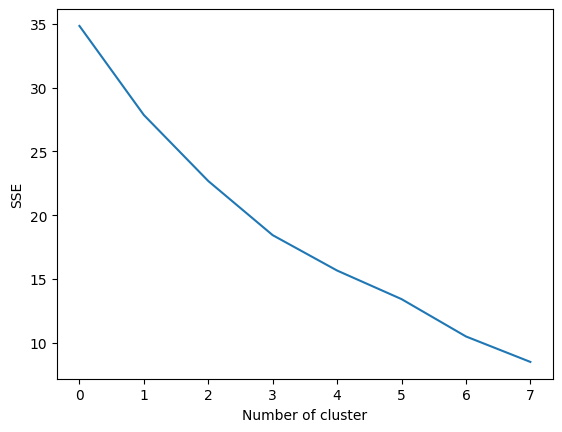

In [ ]:
sse = np.zeros(shape=(8))
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000, n_init=10).fit(X_pca)

    # inertia is the sum of distances of samples to their closest cluster center
    sse[k - 2] = kmeans.inertia_

plt.figure()
plt.plot(sse)
plt.xlabel('Number of cluster')
plt.ylabel('SSE')
plt.show()

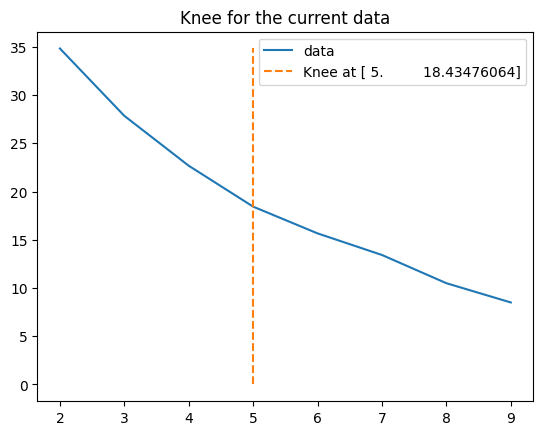


k to use: 5.0


In [ ]:
# get the knee of the function to use for the kmeans
kf = KneeFinder(list(range(2, 10)), sse)
kf.plot(title='Knee for the current data')

knee_x, _ = kf.find_knee()

print()
print(f'k to use: {knee_x}')

In [ ]:
# k = 5
kmeans = KMeans(n_clusters=int(knee_x), max_iter=1000, n_init=10)
clusters = kmeans.fit_predict(X_pca)
centroids = kmeans.cluster_centers_
print(f'with k = 5: {clusters} clusters and {centroids} centroids')

# k = 4
kmeans_4 = KMeans(n_clusters=int(knee_x) - 1, max_iter=1000, n_init=10)
clusters_4 = kmeans_4.fit_predict(X_pca)
centroids_4 = kmeans_4.cluster_centers_
print(f'with k = 4: {clusters_4} clusters and {centroids_4} centroids')

# k = 3
kmeans_3 = KMeans(n_clusters=int(knee_x) - 2, max_iter=1000, n_init=10)
clusters_3 = kmeans_3.fit_predict(X_pca)
centroids_3 = kmeans_3.cluster_centers_
print(f'with k = 3: {clusters_3} clusters and {centroids_3} centroids')

with k = 5: [0 0 0 3 3 0 0 0 4 3 0 1 0 2 3 0 4 0 1 4 1 2] clusters and [[-8.43821318e-01  1.04673513e-01 -1.51334554e-01  8.84939057e-02
   7.31053159e-02  5.42610612e-02 -1.70041743e-03  3.13383986e-02
   1.23589619e-04  1.80483373e-02 -6.06314183e-02 -1.79659687e-02]
 [ 1.02685147e+00 -9.49355520e-01 -5.63419545e-01 -2.52397912e-02
   1.21152556e-01  7.42431403e-02  9.70892909e-02  1.80089843e-02
   2.80826611e-02 -1.84421146e-01  8.75962966e-02 -5.55668208e-02]
 [ 1.29608611e+00  7.07790554e-01  6.49555505e-01  5.17311944e-01
   6.79105093e-01 -1.89046432e-01  1.99552221e-01  3.97286912e-02
   1.35069383e-02 -1.19944070e-02  2.01496770e-16  1.23888376e-17]
 [-7.03734060e-03 -5.58462604e-01  6.81523585e-01 -1.99005872e-01
  -1.59670233e-01  1.15017670e-02 -1.20012397e-01 -1.14438830e-01
  -2.99699170e-02  9.69195954e-02  8.58813232e-02  8.65900374e-02]
 [ 9.31211970e-01  8.73200245e-01 -2.73867059e-01 -3.49273362e-01
  -6.04680027e-01 -1.44418079e-01 -6.44395169e-02  3.62900001e-03
 

# Visualization

In [ ]:
# pca for visualization
X_pca_2 = PCA(n_components=2).fit_transform(X_pca)
X_pca_2

array([[-1.11971431, -0.06175056],
       [-1.02985594,  0.0094327 ],
       [-0.79981499,  0.05322015],
       [-0.24899089, -0.63954648],
       [-0.02106779, -0.44915008],
       [-0.36542954,  0.63540786],
       [-0.98164957,  0.05746257],
       [-0.4449741 , -0.04158574],
       [ 1.78796674,  0.36556135],
       [ 0.02471267, -0.68241376],
       [-1.075488  ,  0.0128333 ],
       [ 1.28390807, -0.60755894],
       [-0.70221388,  0.19220584],
       [ 1.59358116,  0.61891054],
       [ 0.21719665, -0.46274009],
       [-0.8892169 ,  0.1800763 ],
       [-0.00567123,  1.38499981],
       [-1.02985594,  0.0094327 ],
       [ 0.84952261, -1.18974666],
       [ 1.01134041,  0.86903958],
       [ 0.94712372, -1.05076096],
       [ 0.99859106,  0.79667057]])

In [ ]:
tsne = TSNE(n_components=2, perplexity=5, n_iter=10000, random_state=42)
X_tsne = tsne.fit_transform(np.array(X))

In [ ]:
def plot_scatter(ax, X, clusters, title, with_kde=False):
    df = pd.DataFrame(X, columns=['x', 'y'])
    df['cluster'] = clusters

    # customizred color palette
    n_clusters = len(np.unique(clusters))
    color_palette = plt.cm.tab10(np.linspace(0, 1, n_clusters))

    if with_kde:
      sns.kdeplot(data=df, x='x', y='y', hue='cluster', fill=True, alpha=0.5, ax=ax, palette=list(color_palette), warn_singular=False)

    ax.scatter(X_tsne[:, 0], X_tsne[:, 1], c=clusters, cmap=mcolors.ListedColormap('black'), s=50)
    ax.set_title(title)

    # handle the case of clusters having only two nodes
    unique_clusters = np.unique(clusters)
    for cluster in unique_clusters:
        cluster_points = X[clusters == cluster]
        if len(cluster_points) == 2:
            # change the color of the points in case the cluster has only two points, this is because only the line is not visible enough
            ax.scatter(cluster_points[:, 0], cluster_points[:, 1], c=[cluster, cluster], cmap=mcolors.ListedColormap(color_palette[cluster]), s=50)
            # draw lines between points in clusters that have only 2 points
            ax.plot(cluster_points[:, 0], cluster_points[:, 1], c=color_palette[cluster], linestyle='-', linewidth=1)

    # add lables to points
    for (x, y), label in zip(X_tsne, range(len(clusters))):
        ax.text(x, y + 0.7, f'User {label + 1 if label < 16 else label + 2}', fontsize=9, ha='center')

    # build custom legend for the clusters
    legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster + 1}',
                       markerfacecolor=color_palette[cluster], markersize=10)
                       for cluster in range(len(unique_clusters))]
    ax.legend(handles=legend_elements, title='Clusters', loc='best')

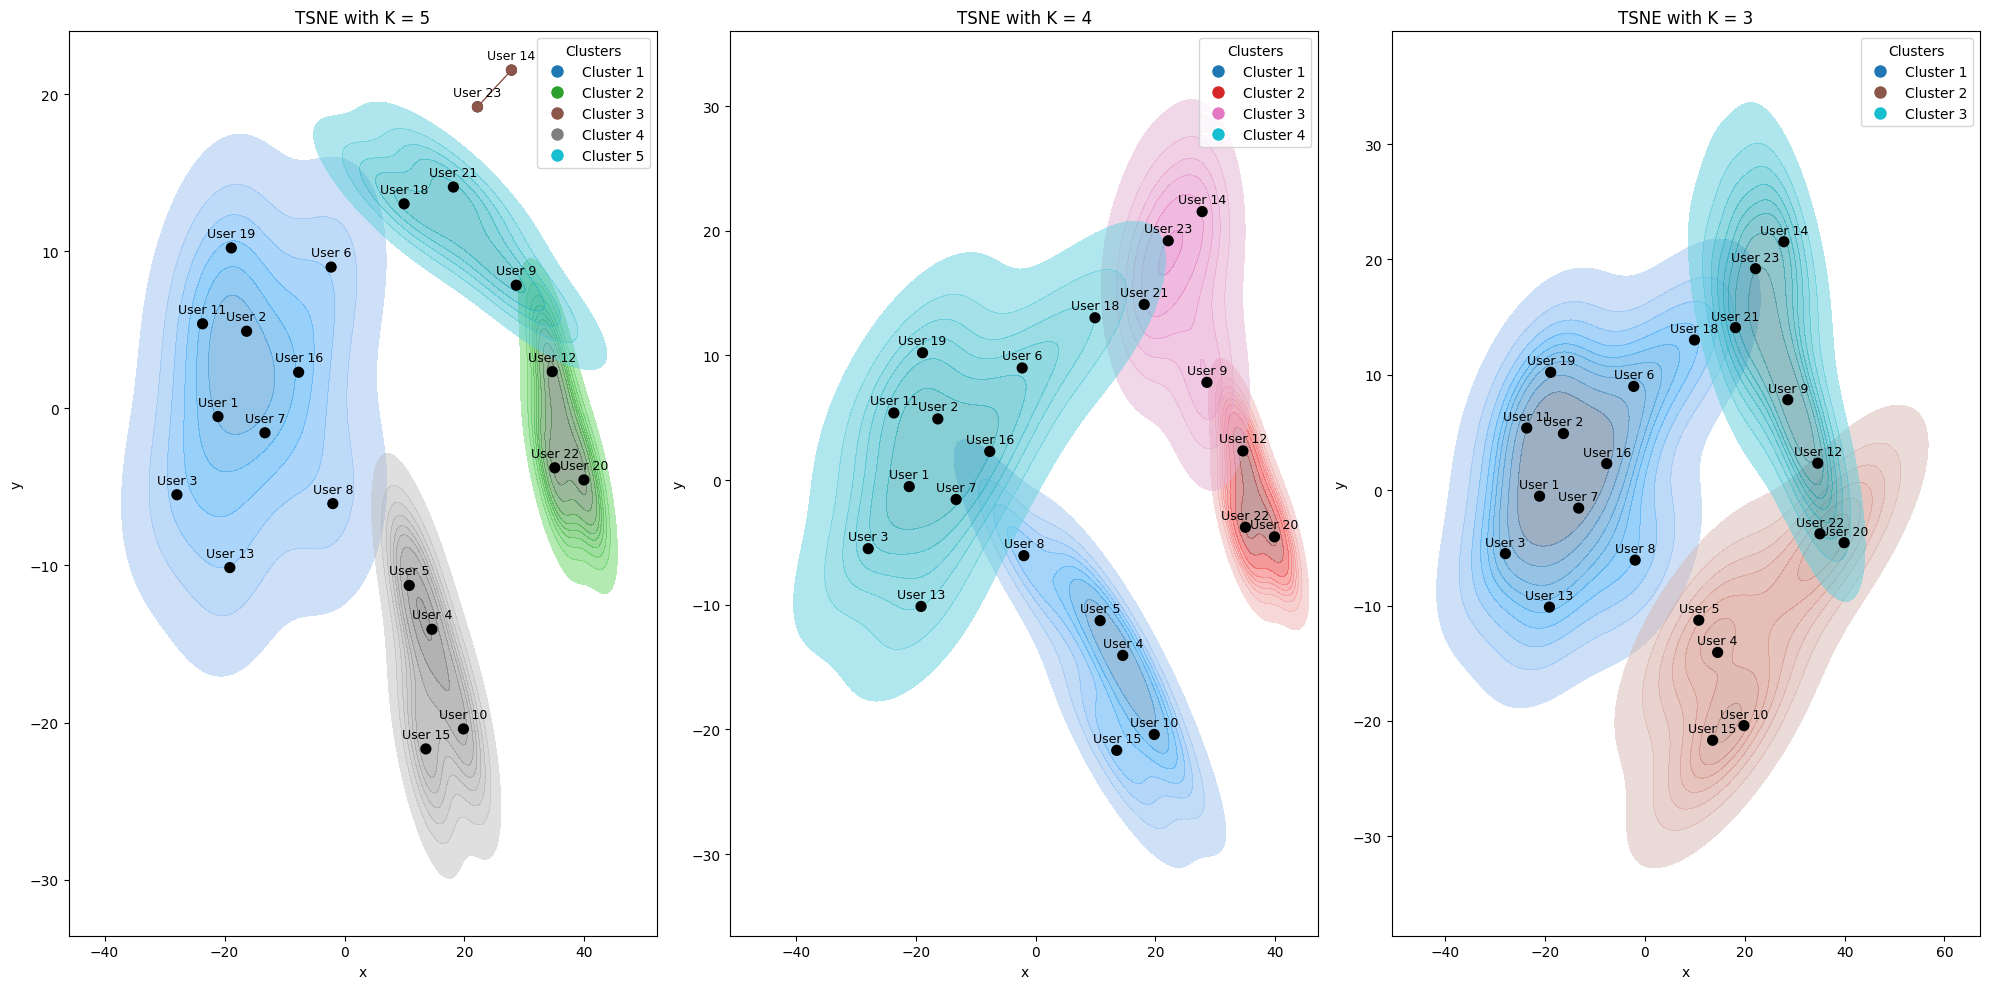

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 10))

plot_scatter(ax1, X_tsne, clusters, 'TSNE with K = 5', True)
plot_scatter(ax2, X_tsne, clusters_4, 'TSNE with K = 4', True)
plot_scatter(ax3, X_tsne, clusters_3, 'TSNE with K = 3', True)

plt.tight_layout()
plt.show()

print()

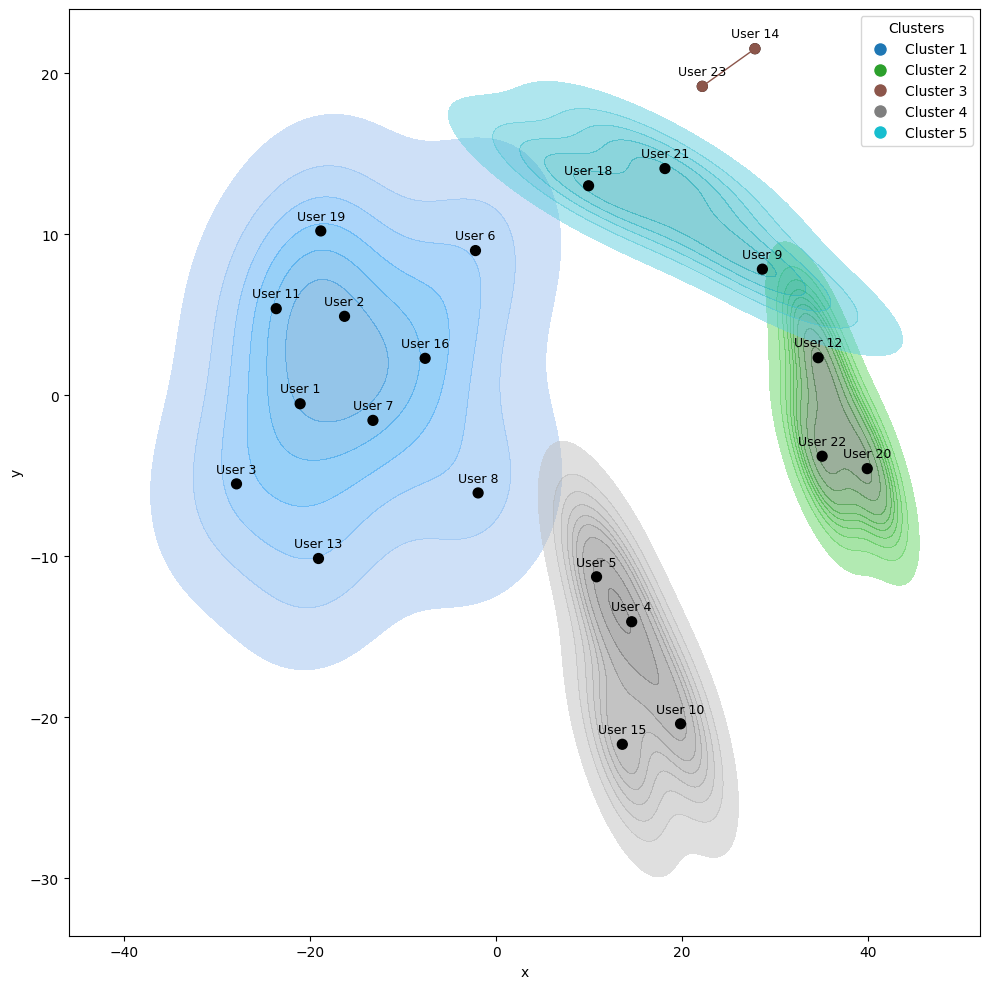

In [ ]:
def plot_fig_scatter(X, clusters, title, with_kde=False):
    df = pd.DataFrame(X, columns=['x', 'y'])
    df['cluster'] = clusters

    # Custom color palette
    n_clusters = len(np.unique(clusters))
    color_palette = plt.cm.tab10(np.linspace(0, 1, n_clusters))

    plt.figure(figsize=(10, 10))

    if with_kde:
        sns.kdeplot(data=df, x='x', y='y', hue='cluster', fill=True, alpha=0.5, palette=list(color_palette), warn_singular=False)

    plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap=mcolors.ListedColormap(['black']), s=50)
    plt.title(title)

    # Handle the case of clusters having only two nodes
    unique_clusters = np.unique(clusters)
    for cluster in unique_clusters:
        cluster_points = X[clusters == cluster]
        if len(cluster_points) == 2:
            # Change the color of the points in case the cluster has only two points
            plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=[cluster, cluster], cmap=mcolors.ListedColormap([color_palette[cluster]]), s=50)
            # Draw lines between points in clusters that have only 2 points
            plt.plot(cluster_points[:, 0], cluster_points[:, 1], c=color_palette[cluster], linestyle='-', linewidth=1)

    # Add labels to points
    for (x, y), label in zip(X, range(len(clusters))):
        plt.text(x, y + 0.7, f'User {label + 1 if label < 16 else label + 2}', fontsize=9, ha='center')

    # Build custom legend for the clusters
    legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster + 1}',
                       markerfacecolor=color_palette[cluster], markersize=10)
                       for cluster in range(len(unique_clusters))]
    plt.legend(handles=legend_elements, title='Clusters', loc='best')

    plt.tight_layout()
    plt.show()

plot_fig_scatter(X_tsne, clusters, '', True)